# PZT Actuator Model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field

## Material Properties
These are the properties for all materials used in MFI actuators

### General Material Data Class

In [4]:
@dataclass
class LayerMaterial:
    piezoconfig: int
    wnom: float
    thickness: float  # quoted material thickness
    E: np.ndarray  # Young's modulus
    a: np.ndarray  # CTE
    v: float  # poisson's ratio
    density: float
    emax: float
    cv: float
    kappa: float

    d31: float = field(init=False)  # piezoelectric constant
    G12: float = field(init=False)  # shear modulus

    # modified constants for piezoelectric material
    p: float = field(init=False)
    Q11: float = field(init=False)
    Q22: float = field(init=False)
    Q12: float = field(init=False)
    Q66: float = field(init=False)
    Q: np.ndarray = field(init=False)

    def __post_init__(self):
        # piezoelectric constant d31 is multiplied by 1+vp because the width is much greater than
        # the thickness, this is the plane strain case (ey = 0) as described by weinberg
        self.d31 = -320e-12 * (1 + self.v)
        self.G12 = self.E / (2 * (1 + self.v))  # shear modulus
        
        # modified constants for piezoelectric material
        # noting that although the the plane strain state is
        # occuring on a ply by ply basis while not neccessarily on the whole
        if self.wnom > self.thickness * 5 * (1 + self.piezoconfig):
            self.p = 1 / (1 - self.v**2)
        else:
            self.p = 1
        
        self.Q11 = self.p * self.E
        self.Q22 = self.p * self.E
        self.Q12 = self.p * self.v * self.E
        self.Q66 = self.G12
        self.Q = np.array([[self.Q11, self.Q12, 0], [self.Q12, self.Q22, 0], [0, 0, self.Q66]])

### Material Specific Data Classes

In [56]:
@dataclass
class PZT:
    # PZT properties
    # (PZT-5H)
    piezoconfig: int
    wnom: float
    thickness: float = 127e-6  # quoted piezo thickness
    E: float =  62e9  # quoted piezo modulus
    a: np.ndarray = field(default_factory=lambda: np.array([3e-6, 3e-6, 0]))  # CTE of PZT
    v: float = 0.31  # poisson's ratio
    density: float = 7.8e3
    emax: float = 0.01
    cv: float = 420
    kappa: float = 1.8

    d31: float = field(init=False)  # piezoelectric constant
    G12: float = field(init=False)  # shear modulus

    # modified constants for piezoelectric material
    p: float = field(init=False)
    Q11: float = field(init=False)
    Q22: float = field(init=False)
    Q12: float = field(init=False)
    Q66: float = field(init=False)
    Q: np.ndarray = field(init=False)

    def __post_init__(self):
        # piezoelectric constant d31 is multiplied by 1+vp because the width is much greater than
        # the thickness, this is the plane strain case (ey = 0) as described by weinberg
        self.d31 = -320e-12 * (1 + self.v)
        self.G12 = self.E / (2 * (1 + self.v))  # shear modulus
        
        # modified constants for piezoelectric material
        # noting that although the the plane strain state is
        # occuring on a ply by ply basis while not neccessarily on the whole
        if self.wnom > self.thickness * 5 * (1 + self.piezoconfig):
            self.p = 1 / (1 - self.v**2)
        else:
            self.p = 1
        
        self.Q11 = self.p * self.E
        self.Q22 = self.p * self.E
        self.Q12 = self.p * self.v * self.E
        self.Q66 = self.G12
        self.Q = np.array([[self.Q11, self.Q12, 0], [self.Q12, self.Q22, 0], [0, 0, self.Q66]])


@dataclass
class PZNPT:
    # PZNPT properties
    # (PZN-PT single crystal piezo)
    thickness: float = 100e-6  # quoted piezo thickness
    E: float = 15e9  # quoted piezo modulus
    a: np.ndarray = field(default_factory=lambda: np.array([4e-6, 4e-6, 0]))  # CTE of PZNPT
    v: float = 0.26  # poisson's ratio
    density = 8e3
    emax = 0.01

    d31: float = field(init=False)  # piezoelectric constant
    G12: float = field(init=False)  # shear modulus

    # modified constants for piezoelectric
    p: float = field(init=False)
    Q11: float = field(init=False)
    Q22: float = field(init=False)
    Q12: float = field(init=False)
    Q66: float = field(init=False)
    Q: np.ndarray = field(init=False)

    def __post_init__(self):
        # piezoelectric constant d31 is multiplied by 1+vp because the width is much greater than
        # the thickness, this is the plane strain case (ey = 0) as described by weinberg
        self.d31 = -950e-12 * (1 + self.v)
        self.G12 = self.E / (2 * (1 + self.v));  # shear modulus

        # modified constants for piezoelectric
        self.p = 1 / (1 - self.v**2)
        self.Q11 = self.p * self.E
        self.Q22 = self.p * self.E
        self.Q12 = self.p * self.v * self.E
        self.Q66 = self.G12
        self.Q = np.array([[self.Q11, self.Q12, 0], [self.Q12, self.Q22, 0], [0, 0, self.Q66]])


@dataclass
class Steel:
    # Steel properties
    E: float = 190e9  # steel modulus
    a: np.ndarray = field(default_factory=lambda: np.array([15e-6, 15e-6, 0]))  # CTE of steel
    v: float = 0.30  # poisson's ratio
    density: float = 8e3
    
    G12: float = field(init=False)  # shear modulus

    # modified constants for steel
    p: float = field(init=False)
    Q11: float = field(init=False)
    Q22: float = field(init=False)
    Q12: float = field(init=False)
    Q66: float = field(init=False)
    Q: np.ndarray = field(init=False)

    def __post_init__(self):
        self.G12 = self.E / (2 * (1 + self.v))  # shear modulus

        # modified constants for steel
        self.p = 1 / (1 - self.v**2)
        self.Q11 = self.p * self.E
        self.Q22 = self.p * self.E
        self.Q12 = self.p * self.v * self.E
        self.Q66 = self.G12
        self.Q = np.array([[self.Q11, self.Q12, 0], [self.Q12, self.Q22, 0], [0, 0, self.Q66]])


@dataclass
class Silicon:
    # Silicon properties
    E: float = 185e9  # silicon modulus
    a: np.ndarray = field(default_factory=lambda: np.array([2.6e-6, 2.6e-6, 0]))  # CTE of silicon
    v: float = 0.25  # poisson's ratio
    density: float = 2.33e3

    G12: float = field(init=False)  # shear modulus

    # modified constants for silicon
    p: float = field(init=False)
    Q11: float = field(init=False)
    Q22: float = field(init=False)
    Q12: float = field(init=False)
    Q66: float = field(init=False)
    Q: np.ndarray = field(init=False)

    def __post_init__(self):
        self.G12 = self.E / (2 * (1 + self.v))  # shear modulus

        # modified constants for silicon
        self.p = 1 / (1 - self.v**2)
        self.Q11 = self.p * self.E
        self.Q22 = self.p * self.E
        self.Q12 = self.p * self.v * self.E
        self.Q66 = self.G12
        self.Q = np.array([[self.Q11, self.Q12, 0], [self.Q12, self.Q22, 0], [0, 0, self.Q66]])


@dataclass
class SGlass:
    # Composite proprties
    # (S2glass)
    E1: float = 55e9  # quoted s-glass modulus
    E2: float = 14e9
    v: float = 0.33
    # a1: float = 6.5e-6  # CTE of s-glass
    # a2: float = 32e-6
    a: np.ndarray = field(default_factory=lambda: np.array([6.5e-6, 32e-6, 0]))  # CTE of s-glass
    density: float = 1.78e3
    G12: float = 5e9
    emax: float = .065

    # modified constants for S-glass
    p: float = field(init=False)
    Q11: float = field(init=False)
    Q22: float = field(init=False)
    Q12: float = field(init=False)
    Q66: float = field(init=False)
    Q: np.ndarray = field(init=False)

    def __post_init__(self):
        # modified constants for S-glass
        self.p = 1 / (1 - self.v**2 * (self.E2 / self.E1))
        self.Q11 = self.p * self.E1
        self.Q22 = self.p * self.E2
        self.Q12 = self.p * self.v * self.E2
        self.Q66 = self.G12
        self.Q = np.array([[self.Q11, self.Q12, 0], [self.Q12, self.Q22, 0], [0, 0, self.Q66]])


@dataclass
class UHMCF:
    # UHM Carbon Fiber
    # (M55J)
    thickness: float = 1e-6  # passive layer thickness
    E1: float = 260e9  # UHM modulus
    E2: float = 7e9
    v: float = 0.33
    # a1: float = -0.54e-6  # CTE of UHM
    # a2: float = 32e-6
    a: np.ndarray = field(default_factory=lambda: np.array([-0.54e-6, 32e-6, 0]))  # CTE of UHM
    density: float = 1.5e3
    G12: float = 5e9
    emax: float = .0053
    cv: float = 712
    kappa: float = 50

    # modified constants for UHM
    p: float = field(init=False)
    Q11: float = field(init=False)
    Q22: float = field(init=False)
    Q12: float = field(init=False)
    Q66: float = field(init=False)
    Q: np.ndarray = field(init=False)

    def __post_init__(self):
        # modified constants for UHM
        self.p = 1 / (1 - self.v**2 * (self.E2 / self.E1))
        self.Q11 = self.p * self.E1
        self.Q22 = self.p * self.E2
        self.Q12 = self.p * self.v * self.E2
        self.Q66 = self.G12
        self.Q = np.array([[self.Q11, self.Q12, 0], [self.Q12, self.Q22, 0], [0, 0, self.Q66]])

## Actuator Class

In [ ]:
class PZTActuator:
    # Initialize actuator with geometric parameters
    def __init__(self, piezoconfig: int, wnom: float, wr: float, l: float, lr: float, pzt_material: PZT, elastic_material: UHMCF):
        self.piezoconfig = piezoconfig              # actuator configuration: bimorph (=1), unimorph (=0)
        self.wnom = wnom                            # actuator width
        self.wr = wr                                # width ratio
        self.l = l                                  # actuator length
        self.lr = lr                                # extension ratio
        self.pzt_material = pzt_material            # piezo material
        self.elastic_material = elastic_material    # elastic layer material
    
    
    def processlayers(self, plyt, oldlayup):
        """
        Processes the layup to account for which layer the neutral axis
        cuts through and adjusts the z-heights relative to the neutral axis.

        INPUTS:
            plyt        -   (n X 1) vector of layer thicknesses
            oldlayup    -   elastic layer layup

        OUTPUTS:
            newz        -   modified z-heights with respect to the neutral axis
            layup       -   modified layup
        """

        print("\nPROCESS LAYERS")
        # for calculations, get midplane level
        zmid = sum(plyt) / 2
        print(f"zmid: {zmid}")

        print(f"plyt: {plyt}")

        # get the heights of each layer
        plyh = np.zeros(len(plyt))
        for i in range(len(plyt)):
            plyh[i] = sum(plyt[0:i+1])
        print(f"plyh: {plyh}")

        # decide which layer the midplane cuts through
        midlayer = min(np.where(plyh > zmid)[0])
        print(f"midlayer: {midlayer}")

        if midlayer == 0:
            newplyt = [zmid, plyh[0] - zmid, plyt[1:len(plyt)]]
        else:
            newplyt = np.array([plyt[0:(midlayer)][0], zmid - plyh[midlayer - 1], 
                                plyh[midlayer] - zmid, plyt[(midlayer + 1):len(plyt)][0]])
            
        print(f"newplyt: {newplyt}")

        # now get z where z(i) is the directed position of the top surface of 
        # layer i with respect to the midlayer
        half_len = len(newplyt) // 2
        z_array = np.array([-1] * half_len + [1] * (len(newplyt) - half_len))
        print(f"z_array: {z_array}")

        newz = z_array * np.array(newplyt)
        print(f"newz: {newz}")

        # now adjust the layup appropriately
        # if the neutral axis cuts through the last layer (piezo)
        if midlayer == len(plyh):
            # keep the layup the same
            layup = oldlayup;   
        # if the neutral axis does not cut through the last layer...
        else:
            # neutral axis cuts through the elastic layer
            layup = [0, 0] #[oldlayup(1)*[1:midlayer];oldlayup(midlayer);oldlayup(midlayer+1:length(oldlayup))]

        print(f"layup: {layup}")
    
        return newz, layup
    

    def getZN(self, z):
        """
        Returns the individual ply thicknesses for all
        lamina within a laminate

        INPUTS:
            z           -   (n X 1) vector of directed ply coordinates

        OUTPUTS:
            zn1         -   z(n) - z(n-1)
            zn2         -   z(n)^2 - z(n-1)^2
            zn3         -   z(n)^3 - z(n-1)^3
        """

        print("\nGET ZN")
        print(f"z: {z}")

        ztemp = np.hstack([z[z < 0], 0, z[z > 0]])
        print(f"ztemp: {ztemp}")

        zn1 = np.diff(ztemp)
        zn2 = np.diff(ztemp ** 2)
        zn3 = np.diff(ztemp ** 3)
        print(f"zn1: {zn1}")
        print(f"zn2: {zn2}")
        print(f"zn3: {zn3}")

        zn = np.vstack([zn1, zn2, zn3])
        zn = zn.T
        print(f"zn: {zn}")
    
        return zn
    
    
    def getABD(self, layup, Qpiezo, Qelastic, zn):
        """
        Returns the laminate matrices for a given layup with
        plys oriented with the angles in the vector
        laminate.

        INPUTS:
            layup       -   (n-m) X 1 vector of ply angles
            Qelastic    -   elastic layer constants
            Qpiezo      -   piezo layer constants
            zn          -   n X 3 matrix of thickenesses
            piezoconfig -   1 for unimorph, 0 for bimorph

        OUTPUTS:
            A,B,D       -   laminate matrices
        """

        print("\nGET ABD")

        nelasticlayers = len(layup)
        print(f"zn: {zn}")
        npiezolayers = len(zn) - nelasticlayers

        print(f"nelasticlayers: {nelasticlayers}")
        print(f"npiezolayers: {npiezolayers}")

        A = zeros(3,3);
        B = zeros(3,3);
        D = zeros(3,3);

        % if the actuator is a bimorph...
        if piezoconfig,
            % include piezo layers first...
            A = Qpiezo*(zn(1,1)+zn(size(zn,1),1));
            B = Qpiezo*(zn(1,2)+zn(size(zn,1),2));
            D = Qpiezo*(zn(1,3)+zn(size(zn,1),3));
        else
            % the actautor is a unimorph add each piezoelectric
            % layers first...
            for n = nelasticlayers+1:nelasticlayers+npiezolayers,
                A = A + Qpiezo*zn(n,1);
                B = B + Qpiezo*zn(n,2);
                D = D + Qpiezo*zn(n,3);
            end
        end

        # % ... then all other layers
        # for m = 1:nelasticlayers,
        #     angle = layup(m)*pi/180;  % ply angle
        #     Qbarelastic = trotate(Qelastic,angle);
        #     A = A + Qbarelastic*zn(m+piezoconfig,1);
        #     B = B + Qbarelastic*zn(m+piezoconfig,2);
        #     D = D + Qbarelastic*zn(m+piezoconfig,3);
        # end

        # B = B/2;
        # D = D/3;
    
    
    # def energy(self, Qp, Qe, V, d31, layup, G):
    def energy(self, Qpiezo, Qelastic, layup):
        """
        For given elastic layer geometries and properties this function
        calculates the displacement, blocked force, and stiffness for either
        unimorph or bimorph cantilever actuators with arbitrary elastic layer layups.

        INPUTS:
            piezoconfig -   Actuator configuration: bimorph (=1), unimorph (=0)
            width       -   (2 X 1) vector of the actuator nominal width and width ratio
            len         -   (2 X 1) vector of the actuator length and the length ratio
            thickness   -   (2 X 1) vector of piezo thickness and elastic layer thickness
            Qpiezo      -   (3 X 3) vector of piezo material elastic constants
            Qelastic    -   (3 X 3) vector of elastic layer material elastic constants
            V           -   drive voltage
            d31         -   transverse piezoelectric constant
            layup       -   (n X 1) elastic layer layup angles (in degrees)

        OUTPUTS:
            delta       -   free displacement
            Fb          -   blocked force
            k           -   stiffness
        """

        print("\nENERGY")

        # for now, just give ply thicknesses and calculate the stiffnesses, etc...or make this a
        # function and call it from a loop to return the stiffnesses as a function of single ply
        # thickness.

        tpzt = self.pzt_material.thickness  # piezo layer thickness
        telastic = self.elastic_material.thickness  # elastic layer thickness

        # get actuator ply thicknesses
        plyt = np.hstack([tpzt, telastic * np.ones(len(layup)), tpzt])

        newz, layup = self.processlayers(plyt, layup)

        # now get z(n)-z(n-1)...
        zn = self.getZN(newz)

        # now get A,B,C,D for the sglass and the UHM actuator:
        self.getABD(layup, Qpiezo, Qelastic, zn)
        # A, B, D = self.getABD(layup, Qe, Qp, zn)

    #     # get piezoelectric forces and moments:
    #     npiezolayers = length(newz) - length(layup) - piezoconfig
    #     Np, Mp = piezoelectric(V,Qp,zn,d31,npiezolayers)

    #     # now get mid plane strains and curvature
    #     stiffness = np.array([[A, B], [B, D]])
    #     C = np.linalg.inv(stiffness)
    #     P = ( C(4,1)*Np(1) + C(4,2)*Np(2) + C(4,4)*Mp(1) + C(4,5)*Mp(2) )

    #     # extract actuator displacement from radius of curvature
    #     delta = -(P * l**2 / 2) * G[1] * (1 + piezoconfig)

    #     # get the blocked force 
    #     Fb = -(3 * P * wnom) / (2 * l * C[4,4]) * G[2] * (1 + piezoconfig)

    #     # stiffness
    #     k = abs(Fb / delta)

    #     return delta, Fb, k

In [122]:
# Bimorph actuator geometry
piezoconfig = 1;            # bimorph configuration (=1), unimorph (=0)
wnom = 85e-3;               # actuator width
wr = 1;                     # width ratio
l = 12e-3;                  # actuator length
lr = 0.667;                 # extension ratio

pzt_material = PZT(piezoconfig, wnom=wnom)
elastic_material = UHMCF()
bimorph_actuator = PZTActuator(piezoconfig, wnom, wr, l, lr, pzt_material, elastic_material)

# adjusted stiffness matrices
Qpiezo = pzt_material.Q
Qelastic = elastic_material.Q

# actuator elastic layer layup
layup = [0]

bimorph_actuator.energy(Qpiezo, Qelastic, layup)



ENERGY

PROCESS LAYERS
zmid: 0.0001275
plyt: [1.27e-04 1.00e-06 1.27e-04]
plyh: [0.000127 0.000128 0.000255]
midlayer: 1
newplyt: [1.27e-04 5.00e-07 5.00e-07 1.27e-04]
z_array: [-1 -1  1  1]
newz: [-1.27e-04 -5.00e-07  5.00e-07  1.27e-04]
layup: [0, 0]

GET ZN
z: [-1.27e-04 -5.00e-07  5.00e-07  1.27e-04]
ztemp: [-1.27e-04 -5.00e-07  0.00e+00  5.00e-07  1.27e-04]
zn1: [1.265e-04 5.000e-07 5.000e-07 1.265e-04]
zn2: [-1.612875e-08 -2.500000e-13  2.500000e-13  1.612875e-08]
zn3: [2.04838287e-12 1.25000000e-19 1.25000000e-19 2.04838287e-12]
zn: [[ 1.26500000e-04 -1.61287500e-08  2.04838287e-12]
 [ 5.00000000e-07 -2.50000000e-13  1.25000000e-19]
 [ 5.00000000e-07  2.50000000e-13  1.25000000e-19]
 [ 1.26500000e-04  1.61287500e-08  2.04838287e-12]]

GET ABD
zn: [[ 1.26500000e-04 -1.61287500e-08  2.04838287e-12]
 [ 5.00000000e-07 -2.50000000e-13  1.25000000e-19]
 [ 5.00000000e-07  2.50000000e-13  1.25000000e-19]
 [ 1.26500000e-04  1.61287500e-08  2.04838287e-12]]
nelasticlayers: 2
npiezolayers

In [8]:

# drive parameters
roomtemp = 20
curetemp = 120
V = 300

# analysis of s-glass, UHM, silicon, and steel 
t = 1e-6:2e-6:2*thickness.PZT
piezomass = l * wnom * tp * densityp * (1 + piezoconfig)

[Gd, GF] = getG(wr, lr)

G = [Gd,GF];

for i = 1:length(t),
    % mechanical energy
    [delta.UHM(i),Fb.UHM(i),k.UHM(i)] = energy(w,lentotal,[tp t(i)],Qp,QUHM,V,d31,layup,G);
    [delta.SGlass(i),Fb.SGlass(i),k.SGlass(i)] = energy(w,lentotal,[tp t(i)],Qp,Qs,V,d31,layup,G);
    [delta.steel(i),Fb.steel(i),k.steel(i)] = energy(w,lentotal,[tp t(i)],Qp,Qst,V,d31,layup,G);
    [delta.silicon(i),Fb.silicon(i),k.silicon(i)] = energy(w,lentotal,[tp t(i)],Qp,Qsi,V,d31,layup,G);
    % mass:
    % extension mass (assuming extension is reinforced with 120um of sglass)...
    % extension reinforcement is slightly wider than wnom*(2-wr)
    wcorrect = 1.5;
    mass_UHM_ext = l*lr*wnom*(2-wr)*t(i)*density.UHM + 240e-6*wnom*(2-wr)*l*lr*density.SGlass*wcorrect;
    mass_s_ext = l*lr*wnom*(2-wr)*t(i)*density.SGlass + 240e-6*wnom*(2-wr)*l*lr*density.SGlass*wcorrect;
    mass_st_ext = l*lr*wnom*(2-wr)*t(i)*density.steel + 240e-6*wnom*(2-wr)*l*lr*density.SGlass*wcorrect;
    mass_si_ext = l*lr*wnom*(2-wr)*t(i)*density.silicon + 240e-6*wnom*(2-wr)*l*lr*density.SGlass*wcorrect;
    % total mass:
    mass.UHM(i) = l*wnom*t(i)*density.UHM + piezomass + mass_UHM_ext;
    mass.SGlass(i) = l*wnom*t(i)*density.SGlass + piezomass + mass_s_ext;
    mass.steel(i) = l*wnom*t(i)*density.steel + piezomass + mass_st_ext;
    mass.silicon(i) = l*wnom*t(i)*density.silicon + piezomass + mass_si_ext;
end

%create a title for each plot which describes the actuator
if piezoconfig,
    fig_title = strcat('Bimorph',sprintf(', l = %g(mm), l_r = %g , w_{nom} = %g(mm), w_r = %g, V = %g',...
        l*1e3,lr,wnom*1e3,wr,V));
else
    fig_title = strcat('Unimorph',sprintf(', l = %g(mm), l_r = %g , w_{nom} = %g(mm), w_r = %g, V = %g',...
        l*1e3,lr,wnom*1e3,wr,V));
end

SyntaxError: invalid syntax (1998158595.py, line 7)

### Plot Displacement

In [ ]:
set(axes,'Fontsize',14);
plot(t*1e6, delta.UHM*1e6,'r-',... 
    t*1e6, delta.SGlass*1e6,'k:',...
    t*1e6, delta.steel*1e6,'m-.',...
    t*1e6, delta.silicon*1e6,'b--', 'LineWidth',3);
ylabel('Tip Displacement (\mum)','Fontsize',20);
xlabel('Passive Layer Thickness (\mum)','Fontsize',20);
title(fig_title,'Fontsize',18);
%legend('UHM M60J','S2 glass','Steel','Si');
grid on
%print
name = strcat(piezotype,'delta.jpg');
%print(1, '-djpeg', name);

### Plot Blocked Force

In [ ]:
set(axes,'Fontsize',14)
plot(t*1e6,Fb.UHM*1e3,'r-',...
    t*1e6,Fb.SGlass*1e3,'k:',...
    t*1e6,Fb.steel*1e3,'m-.',...
    t*1e6,Fb.silicon*1e3,'b--', 'LineWidth',3)
xlabel('Passive Layer Thickness (\mum)','Fontsize',20)
ylabel('Blocked Force (mN)','Fontsize',20)
title(fig_title,'Fontsize',18)
%    legend('UHM M60J','S2 glass','Steel','Si')
grid on
name = strcat(piezotype,'Fb.jpg')

### Plot Stiffness

In [ ]:
set(axes,'Fontsize',14)
plot(t*1e6,k.UHM,'r-',...
    t*1e6, k.SGlass, 'k:',...
    t*1e6,k.steel,'m-.',...
    t*1e6,k.silicon,'b--', 'LineWidth',3)
xlabel('Passive Layer Thickness (\mum)','Fontsize',20)
ylabel('Stiffness (Nm^-^1)','Fontsize',20)
title(fig_title,'Fontsize',18)
% legend('UHM M60J','S2 glass','Steel','Si')
grid on
name = strcat(piezotype,'stiff.jpg')

### Plot Energy

In [ ]:
set(axes,'Fontsize',14);
plot(t*1e6,delta.UHM.*Fb.UHM/2*1e6,'r-',...
    t*1e6,delta.SGlass.*Fb.SGLass/2*1e6,'k:',...
    t*1e6,delta.steel.*Fb.steel/2*1e6,'m-.',...
    t*1e6,delta.silicon.*Fb.silicon/2*1e6,'b--', 'LineWidth',3);
xlabel('Passive Layer Thickness (\mum)','Fontsize',20);
ylabel('Energy (\muJ)','Fontsize',20);
title(fig_title,'Fontsize',18);
legend('UHM M60J','S2 glass','Steel','Si');
grid on
%print
name = strcat(piezotype,'energy.jpg');
%print(4, '-djpeg', name);


### Plot Energy Density

In [ ]:
set(axes,'Fontsize',14);
plot(t/thickness.PZT,(delta.UHM.*Fb.UHM/2)./mass.UHM,'r-',...
    t/thickness.PZT,(delta.SGlass.*Fb.SGlass/2)./mass.SGlass,'k:',...
    t/thickness.PZT,(delta.steel.*Fb.steel/2)./mass.steel,'m-.',...
    t/thickness.PZT,(delta.silicon.*Fb.silicon/2)./mass.silicon,'b--', 'LineWidth',3);
xlabel('Passive Layer Thickness Ratio (t_r)','Fontsize',20);
ylabel('Energy Density(J/Kg)','Fontsize',20);
title(fig_title,'Fontsize',18);
%  legend('UHM M60J','S2 glass','Steel','Si');
grid on
for i = 1:20:length(t),
    text(t(i)/thickness.PZT,(delta.UHM(i)*Fb.UHM(i)/2)/mass.UHM(i),...
        sprintf('%gmg',round(mass.UHM(i)*1e6*100)/100),'Fontsize',13);
end

%print
name = strcat(piezotype,'density.jpg');
%print(5, '-djpeg', name);

### Plot Extension Ratio

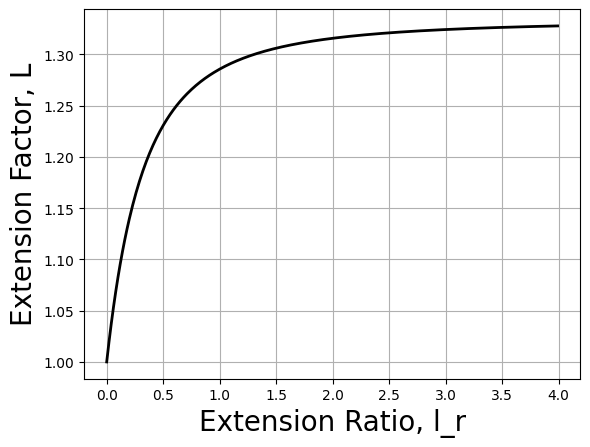

In [ ]:
lr = np.arange(0,4, 0.01)
L = (1 + 2 * lr)**2 / (1 + 3 * lr + 3 * lr**2);  # Eq. (38)

plt.plot(lr, L, 'k', linewidth=2)
plt.xlabel('Extension Ratio, l_r', fontsize=20)
plt.ylabel('Extension Factor, L', fontsize=20)
plt.grid()